### MAST30034: Applied Data Science Project 1
---
# Plotting: Influenza Case Rates Over TIme
#### Xavier Travers (1178369)

Title says it all.

In [1]:
# imports used throughout this notebook
from pyspark.sql import functions as F
import sys

# add homemade helpers
sys.path.insert(1, '../../scripts')
import helpers.plot_helpers as ph

# path where the data files are stored
DATA_PATH = '../../data'

In [2]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName('MAST30034 XT Project 1')
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config('spark.sql.repl.eagerEval.enabled', True) 
    .config('spark.sql.parquet.cacheMetadata', 'true')
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/21 08:31:05 WARN Utils: Your hostname, Polaris resolves to a loopback address: 127.0.1.1; using 172.18.201.145 instead (on interface eth0)
22/08/21 08:31:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/21 08:31:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/21 08:31:07 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/21 08:31:07 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/08/21 08:31:07 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/08/21 08:31:07 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.


In [3]:
# read in the mmwr weeks dataset (to autofill zero values)
mmwr_weeks_df = spark.read.parquet(f'{DATA_PATH}/raw/virals/mmwr_weeks.parquet')
mmwr_weeks_df.limit(5)

year,month,day,month_mmwr_index,week_index,us_format,week_ending,week_month,week_year,borough,__index_level_0__
2019,12,29,1,1,12/29/2019,2020-01-04,1,2020,Bronx,0
2019,12,30,1,1,12/30/2019,2020-01-04,1,2020,Bronx,1
2019,12,31,1,1,12/31/2019,2020-01-04,1,2020,Bronx,2
2020,1,1,1,1,01/01/2020,2020-01-04,1,2020,Bronx,3
2020,1,2,1,1,01/02/2020,2020-01-04,1,2020,Bronx,4


In [4]:
# read in the aggregated covid data
flu_df = spark.read.parquet(f'{DATA_PATH}/curated/virals/flu/aggregated/cases_by_week')
flu_df.limit(5)

week_year,week_month,week_ending,week_index,borough,population,tot_cases,tot_pc_cases,tot_p100k_cases
2020,6,2020-06-06,23,Bronx,1466438.0,0,0.0,0.0
2020,1,2020-01-18,3,Bronx,1466438.0,2331,0.00158956600960968,158.95660096096802
2020,8,2020-08-08,32,Bronx,1466438.0,0,0.0,0.0
2020,12,2020-12-26,52,Bronx,1466438.0,4,2.727698000188211...,0.2727698000188211
2020,7,2020-08-01,31,Bronx,1466438.0,0,0.0,0.0


In [5]:
# combine the stacked mmwr weeks data 

In [6]:
# check that this all worked correctly
flu_df.sort('week_index').limit(20)

week_year,week_month,week_ending,week_index,borough,population,tot_cases,tot_pc_cases,tot_p100k_cases
2020,1,2020-01-04,1,Queens,2395791.0,1471,6.13993457693096E-4,61.39934576930959
2020,1,2020-01-04,1,Bronx,1466438.0,1501,0.001023568674570...,102.35686745706262
2020,1,2020-01-04,1,Staten Island,495522.0,186,3.753617397411215E-4,37.536173974112145
2020,1,2020-01-04,1,Brooklyn,2727393.0,1485,5.444759886089023E-4,54.44759886089023
2020,1,2020-01-04,1,Manhattan,1687834.0,700,4.147327284555234...,41.473272845552344
2020,1,2020-01-11,2,Bronx,1466438.0,1626,0.001108809237076...,110.88092370765078
2020,1,2020-01-11,2,Staten Island,495522.0,143,2.885845633493568...,28.858456334935685
2020,1,2020-01-11,2,Queens,2395791.0,1821,7.600829955534519E-4,76.00829955534519
2020,1,2020-01-11,2,Brooklyn,2727393.0,1815,6.65470652744214E-4,66.5470652744214
2020,1,2020-01-11,2,Manhattan,1687834.0,813,4.816824403347722...,48.16824403347722


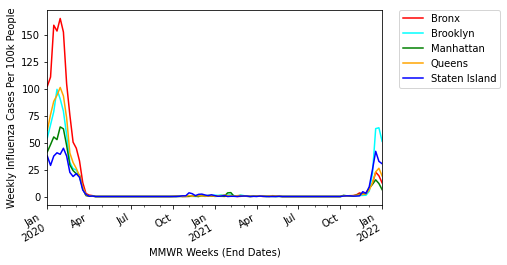

In [10]:
# plot a time-series histogram to show how average weekly trips changes per week
ph.time_series(flu_df.toPandas(), 'tot_p100k_cases',
    ylabel = 'Weekly Influenza Cases Per 100k People')